# Essential Math for Machine Learning: Python Edition

Course source: [LinkedIn Learning](https://www.linkedin.com/learning/essential-math-for-machine-learning-python-edition)

## 1 Vectors
Vectors, and vector spaces, are fundamental to *linear algebra*, and they're used in many machine learning models. Vectors describe spatial lines and planes, enabling you to perform calculations that explore relationships in multi-dimensional space.

### 1.1 What is a Vector
At its simplest, a vector is a numeric element that has both *magnitude* and *direction*. The magnitude represents a distance (for example, "2 miles") and the direction indicates which way the vector is headed (for example, "East"). Vectors are defined by an n-dimensional coordinate that describe a point in space that can be connected by a line from an arbitrary origin.

That all seems a bit complicated, so let's start with a simple, two-dimensional example. In this case, we'll have a vector that is defined by a point in a two-dimensional plane: A two dimensional coordinate consists of an *x* and a *y* value, and in this case we'll use **2** for *x* and **1** for *y*.

Our vector can be written as **v**=(2,1), but more formally we would use the following notation, in which the dimensional coordinate values for the vector are shown as a matrix:
\begin{equation}\vec{v} = \begin{bmatrix}2 \\ 1 \end{bmatrix}\end{equation}

So what exactly does that mean? Well, the coordinate is two-dimensional, and describes the movements required to get to the end point (of *head*) of the vector - in this case, we need to move 2 units in the *x* dimension, and 1 unit in the *y* dimension. Note that we don't specify a starting point for the vector - we're simply describing a destination coordinate that encapsulate the magnitide and direction of the vector. Think about it as the directions you need to follow to get to *there* from *here*, without specifying where *here* actually is!

It can help to visualize the vector, and with a two-dimensional vector, that's pretty straightforward. We just define a two-dimensional plane, choose a starting point, and plot the coordinate described by the vector relative to the starting point.

Run the code in the following cell to visualize the vector **v** (which remember is described by the coordinate (2,1)).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

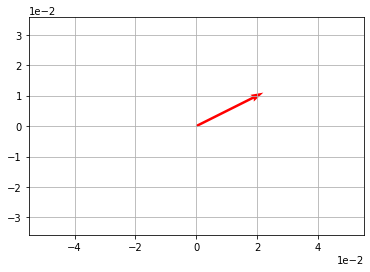

In [2]:
# We'll use a numpy array for our vector
v = np.array([2,1])

# and we'll use a quiver plot to visualize it.
origin = [0], [0]
plt.axis('equal')
plt.grid()
plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0))
plt.quiver(*origin, *v, scale=10, color='r')
plt.show()

Note that we can use a numpy array to define the vector in Python; so to create our (2,1) vector, we simply create a numpy array with the elements [2,1]. We've then used a quiver plot to visualize the vector, using the point 0,0 as the starting point (or *origin*). Our vector of (2,1) is shown as an arrow that starts at 0,0 and moves 2 units along the *x* axis (to the right) and 1 unit along the *y* axis (up).

### 1.2 Calculating Vector Magnitude and Direction
We tend to work with vectors by expressing their components as *cartesian coordinates*; that is, *x* and *y* (and other dimension) values that define the number of units travelled along each dimension. So the coordinates of our (2,1) vector indicate that we must travel 2 units along the *x* axis, and *1* unit along the *y* axis.

However, you can also work with verctors in terms of their *polar coordinates*; that is coordinates that describe the magnitude and direction of the vector. The magnitude is the overall distance of the vector from tail to head, and the direction is the angle at which the vector is oriented.

#### 1.2.1 Calculating Magnitude
Calculating the magnitude of the vector from its cartesian coordinates requires measuring the distance between the arbitrary starting point and the vector head point. For a two-dimensional vector, we're actually just calculating the length of the hypotenuse in a right-angled triangle - so we could simply invoke Pythagorean theorum and calculate the square root of the sum of the squares of it's components, like this:

\begin{equation}\|\vec{v}\| = \sqrt{v_{1}\;^{2} + v_{2}\;^{2}}\end{equation}

The notation for a vector's magnitude is to surround the vector name with vertical bars - you can use single bars (for example, |**v**|) or double bars (||**v**||). Double-bars are often used to avoid confusion with absolute values. Note that the components of the vector are indicated by subscript indices (v<sub>1</sub>, v<sub>2</sub>,...v<sub>*n*</sub>),

In this case, the vector **v** has two components with values **2** and **1**, so our magnitude calculation is:

\begin{equation}\|\vec{v}\| = \sqrt{2^{2} + 1^{2}}\end{equation}

Which is:

\begin{equation}\|\vec{v}\| = \sqrt{4 + 1}\end{equation}

So:

\begin{equation}\|\vec{v}\| = \sqrt{5} \approx 2.24\end{equation}

You can run the following Python code to get a more precise result (note that the elements of a numpy array are zero-based)

In [3]:
vMag = math.sqrt(v[0]**2 + v[1]**2)
print (vMag)

2.23606797749979


This calculation works for vectors of any dimensionality - you just take the square root of the sum of the squared components:

\begin{equation}\|\vec{v}\| = \sqrt{v_{1}\;^{2} + v_{2}\;^{2} ... + v_{n}\;^{2}}\end{equation}

In Python, *numpy* provides a linear algebra library named **linalg** that makes it easier to work with vectors - you can use the **norm** function in the following code to calculate the magnitude of a vector:

In [4]:
vMag = np.linalg.norm(v)
print (vMag)

2.23606797749979


#### 1.2.2 Calculating Direction
To calculate the direction, or *amplitude*, of a vector from its cartesian coordinates, you must employ a little trigonometry. We can get the angle of the vector by calculating the *inverse tangent*; sometimes known as the *arctan* (the *tangent*  calculates an angle as a ratio - the inverse tangent, or **tan<sup>-1</sup>**, expresses this in degrees).

In any right-angled triangle, the tangent is calculated as the *opposite* over the *adjacent*. In a two dimensional vector, this is the *y* value over the *x* value, so for our **v** vector (2,1):

\begin{equation}tan(\theta) = \frac{1}{2}\end{equation}

This produces the result ***0.5***, from which we can use a calculator to calculate the inverse tangent to get the angle in degrees:

\begin{equation}\theta = tan^{-1} (0.5) \approx 26.57^{o}\end{equation}

Note that the direction angle is indicated as ***&theta;***.

Run the following Python code to confirm this:

In [5]:
v = np.array([2,1])
vTan = v[1] / v[0]
print ('tan = ' + str(vTan))
vAtan = math.atan(vTan)
# atan returns the angle in radians, so convert to degrees
print('inverse-tan = ' + str(math.degrees(vAtan)))

tan = 0.5
inverse-tan = 26.56505117707799


There is an added complication however, because if the value for *x* or *y* (or both) is negative, the orientation of the vector is not standard, and a calculator can give you the wrong tan<sup>-1</sup> value. To ensure you get the correct direction for your vector, use the following rules:
- Both *x* and *y* are positive: Use the tan<sup>-1</sup> value.
- *x* is negative, *y* is positive: Add 180 to the tan<sup>-1</sup> value.
- Both *x* and *y* are negative: Add 180 to the tan<sup>-1</sup> value.
- *x* is positive, *y* is negative: Add 360 to the tan<sup>-1</sup> value.

To understand why we need to do this, think of it this way. A vector can be pointing in any direction through a 360 degree arc.  Let's break that circle into four quadrants with the x and y axis through the center. Angles can be measured from the x axis in both the positive (counter-clockwise) and negative (clockwise) directions. We'll number the quadrants in the positive (counter-clockwise) direction (which is how we measure the *positive* angle) like this:

    

    2 | 1
    - o -
    3 | 4


OK, let's look at 4 example vectors

 1. Vector [2,4] has positive values for both x and y. The line for this vector travels through the point 0,0 from quadrant 3 to quadrant 1. Tan<sup>-1</sup> of 4/2 is around 63.4 degrees, which is the positive angle from the x axis to the vector line - so this is the direction of the vector.
 2. Vector [-2,4] has a negative x and positive y. The line for this vector travels through point 0,0 from quadrant 4 to quadrant 2. Tan<sup>-1</sup> of 4/-2 is around -64.4 degrees, which is the *negative* angle from x to the vector line; but in the wrong direction (as if the vector was travelling from quadrant 2 towards quadrant 4). So we need the opposite direction, which we get by adding 180.
 3. Vector [-2,-4] has negative x and y. The line for the vector travels through 0,0 from quadrant 1 to quadrant 3. Tan<sup>-1</sup> of -4/-2 is around 63.4 degrees, which is the angle between the x axis and the line, but again in the opposite direction, from quadrant 3 to quadrant 1; we need to go a further 180 degrees to reflect the correct direction.
 4. Vector [2,-4] has positive x and negative y. It travels through 0,0 from quadrant 2 to quadrant 4. Tan<sup>-1</sup> of -4/2 is around -64.4 degrees, which is the *negative* angle from the x axis to the vector line. Technically it's correct, the line is travelleing down and to the right at an angle of -63.4 degrees; but we want to express the *positive* (counter-clockwise) angle, so we add 360.


In the previous Python code, we used the *math.**atan*** function to calculate the inverse tangent from a numeric tangent. The *numpy* library includes a similar ***arctan*** function. When working with numpy arrays, you can also use the *numpy.**arctan2*** function to return the inverse tangent of an array-based vector in *radians*, and you can use the *numpy.**degrees*** function to convert this to degrees. The ***arctan2*** function automatically makes the necessary adjustment for negative *x* and *y* values.

In [6]:
v = np.array([2,1])
print ('v: ' + str(np.degrees(np.arctan2(v[1], v[0]))))

s = np.array([-3,2])
print ('s: ' + str(np.degrees(np.arctan2(s[1], s[0]))))

v: 26.56505117707799
s: 146.30993247402023


### 1.3 Vector Addition
So far, we've worked with one vector at a time. What happens when you need to add two vectors.

Let's take a look at an example, we already have a vector named **v**, as defined here:
\begin{equation}\vec{v} = \begin{bmatrix}2 \\ 1 \end{bmatrix}\end{equation}
Now let's create a second vector, and called **s** like this:
\begin{equation}\vec{s} = \begin{bmatrix}-3 \\ 2 \end{bmatrix}\end{equation}

Run the cell below to create **s** and plot it together with **v**:

In [7]:
v = np.array([2,1])
s = np.array([-3,2])
print (s)

[-3  2]


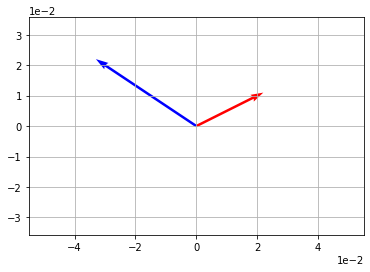

In [8]:
# Plot v and s
vecs = np.array([v,s])
origin = [0,0], [0,0]
plt.axis('equal')
plt.grid()
plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0))
plt.quiver(*origin, vecs[:,0], vecs[:,1], color=['r', 'b'], scale=10)
plt.show()

You can see in the plot that the two vectors have different directions and magnitudes. So what happens when we add them together?

Here's the formula:
\begin{equation}\vec{z} = \vec{v}+\vec{s}\end{equation}

In terms of our vector matrices, this looks like this:
\begin{equation}\vec{z} = \begin{bmatrix}2 \\ 1 \end{bmatrix} + \begin{bmatrix}-3 \\ 2 \end{bmatrix}\end{equation}

Which gives the following result:
\begin{equation}\vec{z} = \begin{bmatrix}2 \\ 1 \end{bmatrix} + \begin{bmatrix}-3 \\ 2 \end{bmatrix} = \begin{bmatrix}-1 \\ 3 \end{bmatrix}\end{equation}

Let's verify that Python gives the same result:

In [9]:
z = v + s
print(z)

[-1  3]


So what does that look like on our plot?

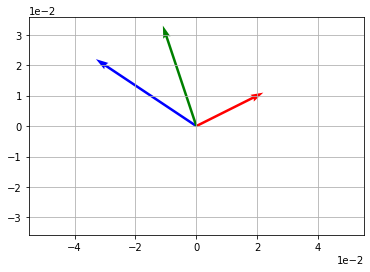

In [10]:
vecs = np.array([v,s,z])
origin = [0,0,0], [0,0,0]
plt.axis('equal')
plt.grid()
plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0))
plt.quiver(*origin, vecs[:,0], vecs[:,1], color=['r', 'b', 'g'], scale=10)
plt.show()

So what's going on here?
Well, we added the dimensions of **s** to the dimensions of **v** to describe a new vector **z**. Let's break that down:
- The dimensions of **v** are (2,1), so from our starting point we move 2 units in the *x* dimension (across to the right) and 1 unit in the *y* dimension (up). In the plot, if you start at the (0,0) position, this is shown as the red arrow.
- Then we're adding **s**, which has dimension values (-3, 2), so we move -3 units in the *x* dimension (across to the left, because it's a negative number) and then 2 units in the *y* dimension (up). On the plot, if you start at the head of the red arrow and make these moves, you'll end up at the head of the green arrow, which represents **z**.

The same is true if you perform the addition operation the other way around and add **v** to **s**, the steps to create **s** are described by the blue arrow, and if you use that as the starting point for **v**, you'll end up at the head of the green arrow, which represents **z**.

Note on the plot that if you simply moved the tail of the blue arrow so that it started at the head of red arrow, its head would end up in the same place as the head of the green arrow; and the same would be true if you moved tail of the red arrow to the head of the blue arrow.

## 2 Vector Multiplication
Vector multiplication can be performed in three ways:

- Scalar Multiplication
- Dot Product Multiplication
- Cross Product Multiplication

### 2.1 Scalar Multiplication
Let's start with *scalar* multiplication - in other words, multiplying a vector by a single numeric value.

Suppose I want to multiply my vector by 2, which I could write like this:

\begin{equation} \vec{w} = 2\vec{v}\end{equation}

Note that the result of this calculation is a new vector named **w**. So how would we calculate this?
Recall that **v** is defined like this:

\begin{equation}\vec{v} = \begin{bmatrix}2 \\ 1 \end{bmatrix}\end{equation}

To calculate 2v, we simply need to apply the operation to each dimension value in the vector matrix, like this:

\begin{equation}\vec{w} = \begin{bmatrix}2 \cdot 2 \\  2 \cdot 1 \end{bmatrix}\end{equation}

Which gives us the following result:

\begin{equation}\vec{w} = \begin{bmatrix}2 \cdot 2 \\  2 \cdot 1 \end{bmatrix} = \begin{bmatrix}4 \\ 2 \end{bmatrix}\end{equation}

In Python, you can apply these sort of matrix operations directly to numpy arrays, so we can simply calculate **w** like this:

[4 2]


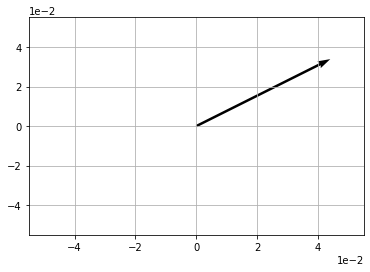

In [11]:
v = np.array([2,1])

w = 2 * v
print(w)

# Plot w
origin = [0], [0]
plt.grid()
plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0))
plt.quiver(*origin, *w, scale=10)
plt.show()

The same approach is taken for scalar division.

Try it for yourself - use the cell below to calculate a new vector named **b** based on the following definition:

\begin{equation}\vec{b} = \frac{\vec{v}}{2}\end{equation}

[1.  0.5]


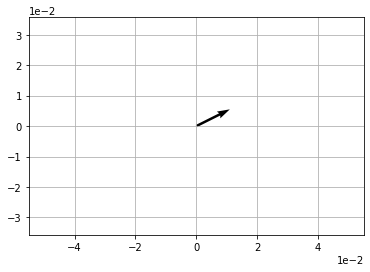

In [12]:
b = v / 2
print(b)

# Plot b
origin = [0], [0]
plt.axis('equal')
plt.grid()
plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0))
plt.quiver(*origin, *b, scale=10)
plt.show()

### 2.2 Dot Product Multiplication
So we've seen how to multiply a vector by a scalar. How about multiplying two vectors together? There are actually two ways to do this depending on whether you want the result to be a *scalar product* (in other words, a number) or a *vector product* (a vector).

To get a scalar product, we calculate the *dot product*. This takes a similar approach to multiplying a vector by a scalar, except that it multiplies each component pair of the vectors and sums the results. To indicate that we are performing a dot product operation, we use the &bull; operator:

\begin{equation} \vec{v} \cdot \vec{s} = (v_{1} \cdot s_{1}) + (v_{2} \cdot s_{2}) ... + \; (v_{n} \cdot s_{n})\end{equation}

So for our vectors **v** (2,1) and **s** (-3,2), our calculation looks like this:

\begin{equation} \vec{v} \cdot \vec{s} = (2 \cdot -3) + (1 \cdot 2) = -6 + 2 = -4\end{equation}

So the dot product, or scalar product, of **v** &bull; **s** is **-4**.

In Python, you can use the *numpy.**dot*** function to calculate the dot product of two vector arrays:

In [13]:
v = np.array([2,1])
s = np.array([-3,2])
d = np.dot(v,s)
print (d)

-4


In Python 3.5 and later, you can also use the **@** operator to calculate the dot product:

In [14]:
v = np.array([2,1])
s = np.array([-3,2])
d = v @ s
print (d)

-4


#### 2.2.1 The Cosine Rule
An useful property of vector dot product multiplication is that we can use it to calculate the cosine of the angle between two vectors. We could write the dot products as:

$$ \vec{v} \cdot \vec{s} = \|\vec{v} \|\|\vec{s}\| \cos (\theta) $$ 

Which we can rearrange as:

$$ \cos(\theta) = \frac{\vec{v} \cdot \vec{s}}{\|\vec{v} \|\|\vec{s}\|} $$

So for our vectors **v** (2,1) and **s** (-3,2), our calculation looks like this:

$$ \cos(\theta) = \frac{(2 \cdot-3) + (-3 \cdot 2)}{\sqrt{2^{2} + 1^{2}} \times \sqrt{-3^{2} + 2^{2}}} $$

So:

$$\cos(\theta) = \frac{-4}{8.0622577483}$$

Which calculates to:

$$\cos(\theta) = -0.496138938357 $$

So:

$$\theta \approx 119.74 $$

Here's that calculation in Python:

In [15]:
# define our vectors
v = np.array([2,1])
s = np.array([-3,2])

# get the magnitudes
vMag = np.linalg.norm(v)
sMag = np.linalg.norm(s)

# calculate the cosine of theta
cos = (v @ s) / (vMag * sMag)

# so theta (in degrees) is:
theta = math.degrees(math.acos(cos))

print(theta)

119.74488129694222


### 2.3 Cross Product Multiplication
To get the *vector product* of multipying two vectors together, you must calculate the *cross product*. The result of this is a new vector that is at right angles to both the other vectors in 3D Euclidean space. This means that the cross-product only really makes sense when working with vectors that contain three components.

For example, let's suppose we have the following vectors:

\begin{equation}\vec{p} = \begin{bmatrix}2 \\ 3 \\ 1 \end{bmatrix}\;\; \vec{q} = \begin{bmatrix}1 \\ 2 \\ -2 \end{bmatrix}\end{equation}

To calculate the cross product of these vectors, written as **p** x **q**, we need to create a new vector (let's call it **r**) with three components (r<sub>1</sub>, r<sub>2</sub>, and r<sub>3</sub>). The values for these components are calculated like this:

\begin{equation}r_{1} = p_{2}q_{3} - p_{3}q_{2}\end{equation}
\begin{equation}r_{2} = p_{3}q_{1} - p_{1}q_{3}\end{equation}
\begin{equation}r_{3} = p_{1}q_{2} - p_{2}q_{1}\end{equation}

So in our case:

\begin{equation}\vec{r} = \vec{p} \times \vec{q} = \begin{bmatrix}(3 \cdot -2) - (1 \cdot 2) \\ (1 \cdot 1) - (2 \cdot -2) \\ (2 \cdot 2) - (3 \cdot 1) \end{bmatrix} = \begin{bmatrix}-6 - 2 \\ 1 - -4 \\ 4 - 3 \end{bmatrix} = \begin{bmatrix}-8 \\ 5 \\ 1 \end{bmatrix}\end{equation}

In Python, you can use the *numpy.**cross*** function to calculate the cross product of two vector arrays:

In [16]:
p = np.array([2,3,1])
q = np.array([1,2,-2])
r = np.cross(p,q)
print (r)

[-8  5  1]


## 3 Introduction to Matrices
In general terms, a matrix is an array of numbers that are arranged into rows and columns.

### 3.1 Matrices and Matrix Notation
A matrix arranges numbers into rows and columns, like this:

\begin{equation}A = \begin{bmatrix}
  1 & 2 & 3 \\
  4 & 5 & 6
 \end{bmatrix}
\end{equation}

Note that matrices are generally named as a capital letter. We refer to the *elements* of the matrix using the lower case equivalent with a subscript row and column indicator, like this:

\begin{equation}A = \begin{bmatrix}
  a_{1,1} & a_{1,2} & a_{1,3} \\
  a_{2,1} & a_{2,2} & a_{2,3}
 \end{bmatrix}
\end{equation}

In Python, you can define a matrix as a 2-dimensional *numpy.**array***, like this:

In [17]:
import numpy as np

In [18]:
A = np.array([[1,2,3],
              [4,5,6]])
print (A)

[[1 2 3]
 [4 5 6]]


You can also use the **numpy.matrix** type, which is a specialist subclass of **array**:

In [19]:
M = np.matrix([[1,2,3],
               [4,5,6]])
print (M)

[[1 2 3]
 [4 5 6]]


There are some differences in behavior between ***array*** and ***matrix*** types - particularly with regards to multiplication (which we'll explore later). You can use either, but most experienced Python programmers who need to work with both vectors and matrices tend to prefer the ***array*** type for consistency.

### 3.2 Matrix Operations
Matrices support common arithmetic operations.

#### 3.2.1 Adding Matrices
To add two matrices of the same size together, just add the corresponding elements in each matrix:

\begin{equation}\begin{bmatrix}1 & 2 & 3 \\4 & 5 & 6\end{bmatrix}+ \begin{bmatrix}6 & 5 & 4 \\3 & 2 & 1\end{bmatrix} = \begin{bmatrix}7 & 7 & 7 \\7 & 7 & 7\end{bmatrix}\end{equation}

In this example, we're adding two matrices (let's call them ***A*** and ***B***). Each matrix has two rows of three columns (so we describe them as 2x3 matrices). Adding these will create a new matrix of the same dimensions with the values a<sub>1,1</sub> + b<sub>1,1</sub>, a<sub>1,2</sub> + b<sub>1,2</sub>, a<sub>1,3</sub> + b<sub>1,3</sub>,a<sub>2,1</sub> + b<sub>2,1</sub>, a<sub>2,2</sub> + b<sub>2,2</sub>, and a<sub>2,3</sub> + b<sub>2,3</sub>. In this instance, each pair of corresponding elements(1 and 6, 2, and 5, 3 and 4, etc.) adds up to 7.

Let's try that with Python:

In [20]:
A = np.array([[1,2,3],
              [4,5,6]])
B = np.array([[6,5,4],
              [3,2,1]])
print(A + B)

[[7 7 7]
 [7 7 7]]


#### 3.2.2 Subtracting Matrices
Matrix subtraction works similarly to matrix addition:

\begin{equation}\begin{bmatrix}1 & 2 & 3 \\4 & 5 & 6\end{bmatrix}- \begin{bmatrix}6 & 5 & 4 \\3 & 2 & 1\end{bmatrix} = \begin{bmatrix}-5 & -3 & -1 \\1 & 3 & 5\end{bmatrix}\end{equation}

Here's the Python code to do this:

In [21]:
A = np.array([[1,2,3],
              [4,5,6]])
B = np.array([[6,5,4],
              [3,2,1]])
print (A - B)

[[-5 -3 -1]
 [ 1  3  5]]


##### 3.2.2.1 Conformability
In the previous examples, we were able to add and subtract the matrices, because the *operands* (the matrices we are operating on) are ***conformable*** for the specific operation (in this case, addition or subtraction). To be conformable for addition and subtraction, the operands must have the same number of rows and columns. There are different conformability requirements for other operations, such as multiplication; which we'll explore later.

#### 3.2.3 Negative Matrices
The nagative of a matrix, is just a matrix with the sign of each element reversed:

\begin{equation}C = \begin{bmatrix}-5 & -3 & -1 \\1 & 3 & 5\end{bmatrix}\end{equation}

\begin{equation}-C = \begin{bmatrix}5 & 3 & 1 \\-1 & -3 & -5\end{bmatrix}\end{equation}

Let's see that with Python:

In [22]:
C = np.array([[-5,-3,-1],
              [1,3,5]])
print (C)
print (-C)

[[-5 -3 -1]
 [ 1  3  5]]
[[ 5  3  1]
 [-1 -3 -5]]


#### 3.2.4 Matrix Transposition
You can *transpose* a matrix, that is switch the orientation of its rows and columns. You indicate this with a superscript **T**, like this:

\begin{equation}\begin{bmatrix}1 & 2 & 3 \\4 & 5 & 6\end{bmatrix}^{T} = \begin{bmatrix}1 & 4\\2 & 5\\3 & 6 \end{bmatrix}\end{equation}

In Python, both **numpy.array** and **numpy.matrix** have a **T** function:

In [23]:
A = np.array([[1,2,3],
              [4,5,6]])
print(A.T)

[[1 4]
 [2 5]
 [3 6]]


## 4 More Matrices
This notebook continues your exploration of matrices.

### 4.1 Matrix Multiplication
Multiplying matrices is a little more complex than the operations we've seen so far. There are two cases to consider, *scalar multiplication* (multiplying a matrix by a single number), and *dot product matrix multiplication* (multiplying a matrix by another matrix.
#### 4.1.1 Scalar Multiplication
To multiply a matrix by a scalar value, you just multiply each element by the scalar to produce a new matrix:

\begin{equation}2 \times \begin{bmatrix}1 & 2 & 3 \\4 & 5 & 6\end{bmatrix} = \begin{bmatrix}2 & 4 & 6 \\8 & 10 & 12\end{bmatrix}\end{equation}

In Python, you perform this calculation using the **\*** operator:

In [24]:
import numpy as np

In [25]:
A = np.array([[1,2,3],
              [4,5,6]])
print(2 * A)

[[ 2  4  6]
 [ 8 10 12]]


#### 4.1.2 Dot Product Matrix Multiplication
To mulitply two matrices together, you need to calculate the *dot product* of rows and columns. This means multiplying each of the elements in each row of the first matrix by each of the elements in each column of the second matrix and adding the results. We perform this operation by applying the *RC* rule - always multiplying ***R***ows by ***C***olumns. For this to work, the number of ***columns*** in the first matrix must be the same as the number of ***rows*** in the second matrix so that the matrices are *conformable* for the dot product operation.

Sounds confusing, right?

Let's look at an example:

\begin{equation}\begin{bmatrix}1 & 2 & 3 \\4 & 5 & 6\end{bmatrix} \cdot \begin{bmatrix}9 & 8 \\ 7 & 6 \\ 5 & 4\end{bmatrix}\end{equation}

Note that the first matrix is 2x3, and the second matrix is 3x2. The important thing here is that the first matrix has two rows, and the second matrix has two columns. To perform the multiplication, we first take the dot product of the first ***row*** of the first matrix (1,2,3) and the first ***column*** of the second matrix (9,7,5):

\begin{equation}(1,2,3) \cdot (9,7,5) = (1 \times 9) + (2 \times 7) + (3 \times 5) = 38\end{equation}

In our resulting matrix (which will always have the same number of ***rows*** as the first matrix, and the same number of ***columns*** as the second matrix), we can enter this into the first row and first column element:

\begin{equation}\begin{bmatrix}38 & ?\\? & ?\end{bmatrix} \end{equation}

Now we can take the dot product of the first row of the first matrix and the second column of the second matrix:

\begin{equation}(1,2,3) \cdot (8,6,4) = (1 \times 8) + (2 \times 6) + (3 \times 4) = 32\end{equation}

Let's add that to our resulting matrix in the first row and second column element:

\begin{equation}\begin{bmatrix}38 & 32\\? & ?\end{bmatrix} \end{equation}

Now we can repeat this process for the second row of the first matrix and the first column of the second matrix:

\begin{equation}(4,5,6) \cdot (9,7,5) = (4 \times 9) + (5 \times 7) + (6 \times 5) = 101\end{equation}

Which fills in the next element in the result:

\begin{equation}\begin{bmatrix}38 & 32\\101 & ?\end{bmatrix} \end{equation}

Finally, we get the dot product for the second row of the first matrix and the second column of the second matrix:

\begin{equation}(4,5,6) \cdot (8,6,4) = (4 \times 8) + (5 \times 6) + (6 \times 4) = 86\end{equation}

Giving us:

\begin{equation}\begin{bmatrix}38 & 32\\101 & 86\end{bmatrix} \end{equation}

In Python, you can use the **numpy.dot** function or the **@** operator to multiply matrices and two-dimensional arrays:

In [26]:
A = np.array([[1,2,3],
              [4,5,6]])
B = np.array([[9,8],
              [7,6],
              [5,4]])
print(np.dot(A,B))
print(A @ B)

[[ 38  32]
 [101  86]]
[[ 38  32]
 [101  86]]


This is one case where there is a difference in behavior between **numpy.array** and **numpy.matrix**, You can also use a regular multiplication (**\***) operator with a matrix, but not with an array:

In [27]:
A = np.matrix([[1,2,3]
               ,[4,5,6]])
B = np.matrix([[9,8],
               [7,6],
               [5,4]])
print(A * B)

[[ 38  32]
 [101  86]]


Note that, unlike with multiplication of regular scalar numbers, the order of the operands in a multiplication operation is significant. For scalar numbers, the *commmutative law* of multiplication applies, so for example:

\begin{equation}2 \times 4 = 4 \times 2\end{equation}

With matrix multiplication, things are different, for example:

\begin{equation}\begin{bmatrix}2 & 4 \\6 & 8\end{bmatrix} \cdot \begin{bmatrix}1 & 3 \\ 5 & 7\end{bmatrix} \ne \begin{bmatrix}1 & 3 \\ 5 & 7\end{bmatrix} \cdot \begin{bmatrix}2 & 4 \\6 & 8\end{bmatrix}\end{equation}

Run the following Python code to test this:

In [28]:
A = np.array([[2,4],
              [6,8]])
B = np.array([[1,3],
              [5,7]])
print(A @ B)
print(B @ A)

[[22 34]
 [46 74]]
[[20 28]
 [52 76]]


### 4.2 Identity Matrices
An *identity* matrix (usually indicated by a capital **I**) is the equivalent in matrix terms of the number **1**. It always has the same number of rows as columns, and it has the value **1** in the diagonal element positions I<sub>1,1</sub>, I<sub>2,2</sub>, etc; and 0 in all other element positions. Here's an example of a 3x3 identity matrix:

\begin{equation}\begin{bmatrix}1 & 0 & 0\\0 & 1 & 0\\0 & 0 & 1\end{bmatrix} \end{equation}

Multiplying any matrix by an identity matrix is the same as multiplying a number by 1; the result is the same as the original value:

\begin{equation}\begin{bmatrix}1 & 2 & 3 \\4 & 5 & 6\\7 & 8 & 9\end{bmatrix} \cdot \begin{bmatrix}1 & 0 & 0\\0 & 1 & 0\\0 & 0 & 1\end{bmatrix} = \begin{bmatrix}1 & 2 & 3 \\4 & 5 & 6\\7 & 8 & 9\end{bmatrix} \end{equation}

If you doubt me, try the following Python code!

In [29]:
A = np.array([[1,2,3],
              [4,5,6],
              [7,8,9]])
B = np.array([[1,0,0],
              [0,1,0],
              [0,0,1]])
print(A @ B)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


### 4.3 Matrix Division
You can't actually divide by a matrix; but when you want to divide matrices, you can take advantage of the fact that division by a given number is the same as multiplication by the reciprocal of that number. For example:

\begin{equation}6 \div 3 = \frac{1}{3}\times 6 \end{equation}

In this case, <sup>1</sup>/<sub>3</sub> is the reciprocal of 3 (which as a fraction is <sup>3</sup>/<sub>1</sub> - we "flip" the numerator and denominator to get the reciprocal). You can also write <sup>1</sup>/<sub>3</sub> as 3<sup>-1</sup>.

#### 4.3.1 Inverse of a Matrix
For matrix division, we use a related idea; we multiply by the *inverse* of a matrix:

\begin{equation}A \div B = A \cdot B^{-1}\end{equation}

The inverse of B is B<sup>-1</sup> as long as the following equation is true:

\begin{equation}B \cdot B^{-1} = B^{-1} \cdot B = I\end{equation}

**I**, you may recall, is an *identity* matrix; the matrix equivalent of 1.

So how do you calculate the inverse of a matrix? For a 2x2 matrix, you can follow this formula:

\begin{equation}\begin{bmatrix}a & b\\c & d\end{bmatrix}^{-1} = \frac{1}{ad-bc}  \begin{bmatrix}d & -b\\-c & a\end{bmatrix}\end{equation}

What happened there?
- We swapped the positions of *a* and *d*
- We changed the signs of *b* and *c*
- We multiplied the resulting matrix by 1 over the *determinant* of the matrix (*ad-bc*)

Let's try with some actual numbers:

\begin{equation}\begin{bmatrix}6 & 2\\1 & 2\end{bmatrix}^{-1} = \frac{1}{(6\times2)-(2\times1)}  \begin{bmatrix}2 & -2\\-1 & 6\end{bmatrix}\end{equation}

So:

\begin{equation}\begin{bmatrix}6 & 2\\1 & 2\end{bmatrix}^{-1} = \frac{1}{10}  \begin{bmatrix}2 & -2\\-1 & 6\end{bmatrix}\end{equation}

Which gives us the result:

\begin{equation}\begin{bmatrix}6 & 2\\1 & 2\end{bmatrix}^{-1} = \begin{bmatrix}0.2 & -0.2\\-0.1 & 0.6\end{bmatrix}\end{equation}

To check this, we can multiply the original matrix by its inverse to see if we get an identity matrix. This makes sense if you think about it; in the same way that 3 x <sup>1</sup>/<sub>3</sub> = 1, a matrix multiplied by its inverse results in an identity matrix:

\begin{equation}\begin{bmatrix}6 & 2\\1 & 2\end{bmatrix} \cdot \begin{bmatrix}0.2 & -0.2\\-0.1 & 0.6\end{bmatrix} = \begin{bmatrix}(6\times0.2)+(2\times-0.1) & (6\times-0.2)+(2\times0.6)\\(1\times0.2)+(2\times-0.1) & (1\times-0.2)+(2\times0.6)\end{bmatrix} = \begin{bmatrix}1 & 0\\0 & 1\end{bmatrix}\end{equation}

Note that not every matrix has an inverse - for example, if the determinant works out to be 0, the inverse matrix is not defined.

In Python, you can use the **numpy.linalg.inv** function to get the inverse of a matrix in an **array** or **matrix** object:

In [30]:
B = np.array([[6,2],
              [1,2]])

print(np.linalg.inv(B))

[[ 0.2 -0.2]
 [-0.1  0.6]]


Additionally, the *matrix* type has an ***I*** method that returns the inverse matrix:

In [31]:
B = np.matrix([[6,2],
              [1,2]])

print(B.I)

[[ 0.2 -0.2]
 [-0.1  0.6]]


For larger matrices, the process to calculate the inverse is more complex. Let's explore an example based on the following matrix:

\begin{equation}\begin{bmatrix}4 & 2 & 2\\6 & 2 & 4\\2 & 2 & 8\end{bmatrix} \end{equation}

The process to find the inverse consists of the following steps:

1: Create a matrix of *minors* by calculating the *determinant* for each element in the matrix based on the elements that are <u>not</u> in the same row or column; like this:

\begin{equation}\begin{bmatrix}\color{blue}4 & \color{lightgray}2 & \color{lightgray}2\\\color{lightgray}6 & \color{red}2 & \color{red}4\\\color{lightgray}2 & \color{red}2 & \color{red}8\end{bmatrix}\;\;\;\;(2\times8) - (4\times2) = 8\;\;\;\;\begin{bmatrix}8 & \color{lightgray}? & \color{lightgray}?\\\color{lightgray}? & \color{lightgray}? & \color{lightgray}?\\\color{lightgray}? & \color{lightgray}? & \color{lightgray}?\end{bmatrix} \end{equation}

\begin{equation}\begin{bmatrix}\color{lightgray}4 & \color{blue}2 & \color{lightgray}2\\\color{red}6 & \color{lightgray}2 & \color{red}4\\\color{red}2 & \color{lightgray}2 & \color{red}8\end{bmatrix}\;\;\;\;(6\times8) - (4\times2) = 40\;\;\;\;\begin{bmatrix}8 & 40 & \color{lightgray}?\\\color{lightgray}? & \color{lightgray}? & \color{lightgray}?\\\color{lightgray}? & \color{lightgray}? & \color{lightgray}?\end{bmatrix}\end{equation}

\begin{equation}\begin{bmatrix}\color{lightgray}4 & \color{lightgray}2 & \color{blue}2\\\color{red}6 & \color{red}2 & \color{lightgray}4\\\color{red}2 & \color{red}2 & \color{lightgray}8\end{bmatrix}\;\;\;\;(6\times2) - (2\times2) = 8\;\;\;\;\begin{bmatrix}8 & 40 & 8\\\color{lightgray}? & \color{lightgray}? & \color{lightgray}?\\\color{lightgray}? & \color{lightgray}? & \color{lightgray}?\end{bmatrix} \end{equation}

\begin{equation}\begin{bmatrix}\color{lightgray}4 & \color{red}2 & \color{red}2\\\color{blue}6 & \color{lightgray}2 & \color{lightgray}4\\\color{lightgray}2 & \color{red}2 & \color{red}8\end{bmatrix}\;\;\;\;(2\times8) - (2\times2) = 12\;\;\;\;\begin{bmatrix}8 & 40 & 8\\12 & \color{lightgray}? & \color{lightgray}?\\\color{lightgray}? & \color{lightgray}? & \color{lightgray}?\end{bmatrix} \end{equation}

\begin{equation}\begin{bmatrix}\color{red}4 & \color{lightgray}2 & \color{red}2\\\color{lightgray}6 & \color{blue}2 & \color{lightgray}4\\\color{red}2 & \color{lightgray}2 & \color{red}8\end{bmatrix}\;\;\;\;(4\times8) - (2\times2) = 28\;\;\;\;\begin{bmatrix}8 & 40 & 8\\12 & 28 & \color{lightgray}?\\\color{lightgray}? & \color{lightgray}? & \color{lightgray}?\end{bmatrix} \end{equation}

\begin{equation}\begin{bmatrix}\color{red}4 & \color{red}2 & \color{lightgray}2\\\color{lightgray}6 & \color{lightgray}2 & \color{blue}4\\\color{red}2 & \color{red}2 & \color{lightgray}8\end{bmatrix}\;\;\;\;(4\times2) - (2\times2) = 4\;\;\;\;\begin{bmatrix}8 & 40 & 8\\12 & 28 & 4\\\color{lightgray}? & \color{lightgray}? & \color{lightgray}?\end{bmatrix} \end{equation}

\begin{equation}\begin{bmatrix}\color{lightgray}4 & \color{red}2 & \color{red}2\\\color{lightgray}6 & \color{red}2 & \color{red}4\\\color{blue}2 & \color{lightgray}2 & \color{lightgray}8\end{bmatrix}\;\;\;\;(2\times4) - (2\times2) = 4\;\;\;\;\begin{bmatrix}8 & 40 & 8\\12 & 28 & 4\\4 & \color{lightgray}? & \color{lightgray}?\end{bmatrix} \end{equation}

\begin{equation}\begin{bmatrix}\color{red}4 & \color{lightgray}2 & \color{red}2\\\color{red}6 & \color{lightgray}2 & \color{red}4\\\color{lightgray}2 & \color{blue}2 & \color{lightgray}8\end{bmatrix}\;\;\;\;(4\times4) - (2\times6) = 4\;\;\;\;\begin{bmatrix}8 & 40 & 8\\12 & 28 & 4\\4 & 4 & \color{lightgray}?\end{bmatrix} \end{equation}

\begin{equation}\begin{bmatrix}\color{red}4 & \color{red}2 & \color{lightgray}2\\\color{red}6 & \color{red}2 & \color{lightgray}4\\\color{lightgray}2 & \color{lightgray}2 & \color{blue}8\end{bmatrix}\;\;\;\;(4\times2) - (2\times6) = -4\;\;\;\;\begin{bmatrix}8 & 40 & 8\\12 & 28 & 4\\4 & 4 & -4\end{bmatrix} \end{equation}


2: Apply *cofactors* to the matrix by switching the sign of every alternate element in the matrix of minors:

\begin{equation}\begin{bmatrix}8 & -40 & 8\\-12 & 28 & -4\\4 & -4 & -4\end{bmatrix} \end{equation}

3: *Adjugate* by transposing elements diagonally:

\begin{equation}\begin{bmatrix}8 & \color{green}-\color{green}1\color{green}2 & \color{orange}4\\\color{green}-\color{green}4\color{green}0 & 28 & \color{purple}-\color{purple}4\\\color{orange}8 & \color{purple}-\color{purple}4 & -4\end{bmatrix} \end{equation}

4: Multiply by 1/determinant of the original matrix. To find this, multiply each of the top row elements by their corresponding minor determinants (which we calculated earlier in the matrix of minors), and then subtract the second from the first and add the third:

\begin{equation}Determinant = (4 \times 8) - (2 \times 40) + (2 \times 8) = -32\end{equation}


\begin{equation}\frac{1}{-32}\begin{bmatrix}8 & -12 & 4\\-40 & 28 & -4\\8 & -4 & -4\end{bmatrix} =  \begin{bmatrix}-0.25 & 0.375 & -0.125\\1.25 & -0.875 & 0.125\\-0.25 & 0.125 & 0.125\end{bmatrix}\end{equation}

Let's verify that the original matrix multiplied by the inverse results in an identity matrix:

\begin{equation}\begin{bmatrix}4 & 2 & 2\\6 & 2 & 4\\2 & 2 & 8\end{bmatrix} \cdot \begin{bmatrix}-0.25 & 0.375 & -0.125\\1.25 & -0.875 & 0.125\\-0.25 & 0.125 & 0.125\end{bmatrix}\end{equation}

\begin{equation}= \begin{bmatrix}(4\times-0.25)+(2\times1.25)+(2\times-0.25) & (4\times0.375)+(2\times-0.875)+(2\times0.125) & (4\times-0.125)+(2\times-0.125)+(2\times0.125)\\(6\times-0.25)+(2\times1.25)+(4\times-0.25) & (6\times0.375)+(2\times-0.875)+(4\times0.125) & (6\times-0.125)+(2\times-0.125)+(4\times0.125)\\(2\times-0.25)+(2\times1.25)+(8\times-0.25) & (2\times0.375)+(2\times-0.875)+(8\times0.125) & (2\times-0.125)+(2\times-0.125)+(8\times0.125)\end{bmatrix} \end{equation}

\begin{equation}= \begin{bmatrix}1 & 0 & 0\\0 & 1 & 0\\0 & 0 & 1\end{bmatrix} \end{equation}

As you can see, this can get pretty complicated - which is why we usually use a calculator or a computer program. You can run the following Python code to verify that the inverse matrix we calculated is correct:

In [32]:
B = np.array([[4,2,2],
              [6,2,4],
              [2,2,8]])

print(np.linalg.inv(B))

[[-0.25   0.375 -0.125]
 [ 1.25  -0.875  0.125]
 [-0.25   0.125  0.125]]


#### 4.3.2 Multiplying by an Inverse Matrix
Now that you know how to calculate an inverse matrix, you can use that knowledge to multiply the inverse of a matrix by another matrix as an alternative to division:

\begin{equation}\begin{bmatrix}1 & 2\\3 & 4\end{bmatrix} \cdot \begin{bmatrix}6 & 2\\1 & 2\end{bmatrix}^{-1} \end{equation}

\begin{equation}=\begin{bmatrix}1 & 2\\3 & 4\end{bmatrix} \cdot \begin{bmatrix}0.2 & -0.2\\-0.1 & 0.6\end{bmatrix}  \end{equation}

\begin{equation}=\begin{bmatrix}(1\times0.2)+(2\times-0.1) & (1\times-0.2)+(2\times0.6)\\(3\times0.2)+(4\times-0.1) & (3\times-0.2)+(4\times0.6)\end{bmatrix}\end{equation}

\begin{equation}=\begin{bmatrix}0 & 1\\0.2 & 1.8\end{bmatrix}\end{equation}

Here's the Python code to calculate this:

In [33]:
A = np.array([[1,2],
              [3,4]])

B = np.array([[6,2],
              [1,2]])


C = A @ np.linalg.inv(B)

print(C)

[[0.  1. ]
 [0.2 1.8]]


### 4.4 Solving Systems of Equations with Matrices
One of the great things about matrices, is that they can help us solve systems of equations. For example, consider the following system of equations:

\begin{equation}2x + 4y = 18\end{equation}
\begin{equation}6x + 2y = 34\end{equation}

We can write this in matrix form, like this:

\begin{equation}\begin{bmatrix}2 & 4\\6 & 2\end{bmatrix} \cdot \begin{bmatrix}x\\y\end{bmatrix}=\begin{bmatrix}18\\34\end{bmatrix}\end{equation}

Note that the variables (***x*** and ***y***) are  arranged as a column in one matrix, which is multiplied by a matrix containing the coefficients to produce as matrix containing the results. If you calculate the dot product on the left side, you can see clearly that this represents the original equations:

\begin{equation}\begin{bmatrix}2x + 4y\\6x + 2y\end{bmatrix} =\begin{bmatrix}18\\34\end{bmatrix}\end{equation}

Now. let's name our matrices so we can better understand what comes next:

\begin{equation}A=\begin{bmatrix}2 & 4\\6 & 2\end{bmatrix}\;\;\;\;X=\begin{bmatrix}x\\y\end{bmatrix}\;\;\;\;B=\begin{bmatrix}18\\34\end{bmatrix}\end{equation}

We already know that ***A &bull; X = B***, which arithmetically means that ***X = B &div; A***. Since we can't actually divide by a matrix, we need to multiply by the inverse; so we can find the values for our variables (*X*) like this: ***X = A<sup>-1</sup> &bull; B***

So, first we need the inverse of A:

\begin{equation}\begin{bmatrix}2 & 4\\6 & 2\end{bmatrix}^{-1} = \frac{1}{(2\times2)-(4\times6)}  \begin{bmatrix}2 & -4\\-6 & 2\end{bmatrix}\end{equation}

\begin{equation}= \frac{1}{-20}  \begin{bmatrix}2 & -4\\-6 & 2\end{bmatrix}\end{equation}

\begin{equation}=\begin{bmatrix}-0.1 & 0.2\\0.3 & -0.1\end{bmatrix}\end{equation}

Then we just multiply this with B:

\begin{equation}X = \begin{bmatrix}-0.1 & 0.2\\0.3 & -0.1\end{bmatrix} \cdot \begin{bmatrix}18\\34\end{bmatrix}\end{equation}

\begin{equation}X = \begin{bmatrix}(-0.1 \times 18)+(0.2 \times 34)\\(0.3\times18)+(-0.1\times34)\end{bmatrix}\end{equation}

\begin{equation}X = \begin{bmatrix}5\\2\end{bmatrix}\end{equation}

The resulting matrix (*X*) contains the values for our *x* and *y* variables, and we can check these by plugging them into the original equations:

\begin{equation}(2\times5) + (4\times2) = 18\end{equation}
\begin{equation}(6\times5) + (2\times2) = 34\end{equation}

These of course simplify to:

\begin{equation}10 + 8 = 18\end{equation}
\begin{equation}30 + 4 = 34\end{equation}

So our variable values are correct.

Here's the Python code to do all of this:

In [34]:
A = np.array([[2,4],
              [6,2]])

B = np.array([[18],
              [34]])

C = np.linalg.inv(A) @ B

print(C)

[[5.]
 [2.]]


## 5 Transformations, Eigenvectors, and Eigenvalues

Matrices and vectors are used together to manipulate spatial dimensions. This has a lot of applications, including the mathematical generation of 3D computer graphics, geometric modeling, and the training and optimization of machine learning algorithms. We're not going to cover the subject exhaustively here; but we'll focus on a few key concepts that are useful to know when you plan to work with machine learning.

### 5.1 Linear Transformations
You can manipulate a vector by multiplying it with a matrix. The matrix acts a function that operates on an input vector to produce a vector output. Specifically, matrix multiplications of vectors are *linear transformations* that transform the input vector into the output vector.

For example, consider this matrix ***A*** and vector ***v***:

$$ A = \begin{bmatrix}2 & 3\\5 & 2\end{bmatrix} \;\;\;\; \vec{v} = \begin{bmatrix}1\\2\end{bmatrix}$$

We can define a transformation ***T*** like this:

$$ T(\vec{v}) = A\vec{v} $$

To perform this transformation, we simply calculate the dot product by applying the *RC* rule; multiplying each row of the matrix by the single column of the vector:

$$\begin{bmatrix}2 & 3\\5 & 2\end{bmatrix} \cdot  \begin{bmatrix}1\\2\end{bmatrix} = \begin{bmatrix}8\\9\end{bmatrix}$$

Here's the calculation in Python:

In [35]:
v = np.array([1,2])
A = np.array([[2,3],
              [5,2]])

t = A@v
print (t)

[8 9]


In this case, both the input vector and the output vector have 2 components - in other words, the transformation takes a 2-dimensional vector and produces a new 2-dimensional vector; which we can indicate like this:

$$ T: \rm I\!R^{2} \to \rm I\!R^{2} $$

Note that the output vector may have a different number of dimensions from the input vector; so the matrix function might transform the vector from one space to another - or in notation, ${\rm I\!R}$<sup>n</sup> -> ${\rm I\!R}$<sup>m</sup>.

For example, let's redefine matrix ***A***, while retaining our original definition of vector ***v***:

$$ A = \begin{bmatrix}2 & 3\\5 & 2\\1 & 1\end{bmatrix} \;\;\;\; \vec{v} = \begin{bmatrix}1\\2\end{bmatrix}$$

Now if we once again define ***T*** like this:

$$ T(\vec{v}) = A\vec{v} $$

We apply the transformation like this:

$$\begin{bmatrix}2 & 3\\5 & 2\\1 & 1\end{bmatrix} \cdot  \begin{bmatrix}1\\2\end{bmatrix} = \begin{bmatrix}8\\9\\3\end{bmatrix}$$

So now, our transformation transforms the vector from 2-dimensional space to 3-dimensional space:

$$ T: \rm I\!R^{2} \to \rm I\!R^{3} $$

Here it is in Python:

In [36]:
v = np.array([1,2])
A = np.array([[2,3],
              [5,2],
              [1,1]])

t = A@v
print (t)

[8 9 3]


In [37]:
v = np.array([1,2])
A = np.array([[1,2],
              [2,1]])

t = A@v
print (t)

[5 4]


### 5.2 Transformations of Magnitude and Amplitude

When you multiply a vector by a matrix, you transform it in at least one of the following two ways:
* Scale the length (*magnitude*) of the matrix to make it longer or shorter
* Change the direction (*amplitude*) of the matrix

For example consider the following matrix and vector:

$$ A = \begin{bmatrix}2 & 0\\0 & 2\end{bmatrix} \;\;\;\; \vec{v} = \begin{bmatrix}1\\0\end{bmatrix}$$

As before, we transform the vector ***v*** by multiplying it with the matrix ***A***:

\begin{equation}\begin{bmatrix}2 & 0\\0 & 2\end{bmatrix} \cdot  \begin{bmatrix}1\\0\end{bmatrix} = \begin{bmatrix}2\\0\end{bmatrix}\end{equation}

In this case, the resulting vector has changed in length (*magnitude*), but has not changed its direction (*amplitude*).

Let's visualize that in Python:

[2 0]


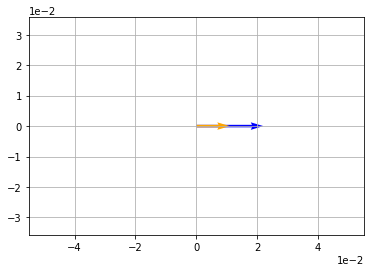

In [39]:
v = np.array([1,0])
A = np.array([[2,0],
              [0,2]])

t = A@v
print (t)

# Plot v and t
vecs = np.array([t,v])
origin = [0,0], [0,0]
plt.axis('equal')
plt.grid()
plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0))
plt.quiver(*origin, vecs[:,0], vecs[:,1], color=['blue', 'orange'], scale=10)
plt.show()

The original vector ***v*** is shown in orange, and the transformed vector ***t*** is shown in blue - note that ***t*** has the same direction (*amplitude*) as ***v*** but a greater length (*magnitude*).

Now let's use a different matrix to transform the vector ***v***:
\begin{equation}\begin{bmatrix}0 & -1\\1 & 0\end{bmatrix} \cdot  \begin{bmatrix}1\\0\end{bmatrix} = \begin{bmatrix}0\\1\end{bmatrix}\end{equation}

This time, the resulting vector has been changed to a different amplitude, but has the same magnitude.

[0 1]


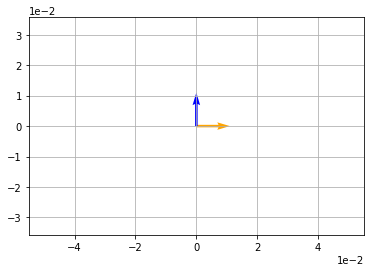

In [41]:
v = np.array([1,0])
A = np.array([[0,-1],
              [1,0]])

t = A@v
print (t)

# Plot v and t
vecs = np.array([v,t])
origin = [0,0], [0,0]
plt.axis('equal')
plt.grid()
plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0))
plt.quiver(*origin, vecs[:,0], vecs[:,1], color=['orange', 'blue'], scale=10)
plt.show()

Now let's see change the matrix one more time:
\begin{equation}\begin{bmatrix}2 & 1\\1 & 2\end{bmatrix} \cdot  \begin{bmatrix}1\\0\end{bmatrix} = \begin{bmatrix}2\\1\end{bmatrix}\end{equation}

Now our resulting vector has been transformed to a new amplitude *and* magnitude - the transformation has affected both direction and scale.

[2 1]


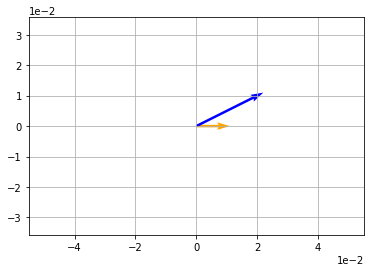

In [42]:
v = np.array([1,0])
A = np.array([[2,1],
              [1,2]])

t = A@v
print (t)

# Plot v and t
vecs = np.array([v,t])
origin = [0,0], [0,0]
plt.axis('equal')
plt.grid()
plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0))
plt.quiver(*origin, vecs[:,0], vecs[:,1], color=['orange', 'blue'], scale=10)
plt.show()

#### 5.2.1 Afine Transformations
An Afine transformation multiplies a vector by a matrix and adds an offset vector, sometimes referred to as *bias*; like this:

$$T(\vec{v}) = A\vec{v} + \vec{b}$$

For example:

\begin{equation}\begin{bmatrix}5 & 2\\3 & 1\end{bmatrix} \cdot  \begin{bmatrix}1\\1\end{bmatrix} + \begin{bmatrix}-2\\-6\end{bmatrix} = \begin{bmatrix}5\\-2\end{bmatrix}\end{equation}

This kind of transformation is actually the basis of linear regression, which is a core foundation for machine learning. The matrix defines the *features*, the first vector is the *coefficients*, and the bias vector is the *intercept*.

here's an example of an Afine transformation in Python:

[ 5 -2]


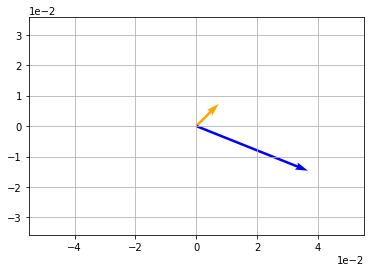

In [43]:
v = np.array([1,1])
A = np.array([[5,2],
              [3,1]])
b = np.array([-2,-6])

t = A@v + b
print (t)

# Plot v and t
vecs = np.array([v,t])
origin = [0,0], [0,0]
plt.axis('equal')
plt.grid()
plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0))
plt.quiver(*origin, vecs[:,0], vecs[:,1], color=['orange', 'blue'], scale=15)
plt.show()

### 5.3 Eigenvectors and Eigenvalues
So we can see that when you transform a vector using a matrix, we change its direction, length, or both. When the transformation only affects scale (in other words, the output vector has a different magnitude but the same amplitude as the input vector), the matrix multiplication for the transformation is the equivalent operation as some scalar multiplication of the vector.

For example, earlier we examined the following transformation that dot-mulitplies a vector by a matrix:

$$\begin{bmatrix}2 & 0\\0 & 2\end{bmatrix} \cdot  \begin{bmatrix}1\\0\end{bmatrix} = \begin{bmatrix}2\\0\end{bmatrix}$$

You can achieve the same result by mulitplying the vector by the scalar value ***2***:

$$2 \times \begin{bmatrix}1\\0\end{bmatrix} = \begin{bmatrix}2\\0\end{bmatrix}$$

The following python performs both of these calculation and shows the results, which are identical.

[2 0]
[2 0]


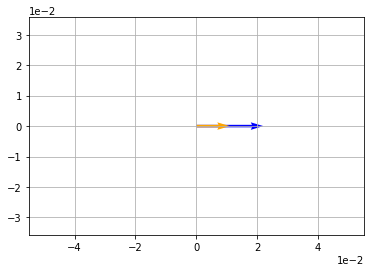

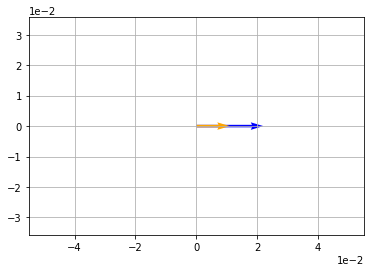

In [44]:
v = np.array([1,0])
A = np.array([[2,0],
              [0,2]])

t1 = A@v
print (t1)
t2 = 2*v
print (t2)

fig = plt.figure()
a=fig.add_subplot(1,1,1)
# Plot v and t1
vecs = np.array([t1,v])
origin = [0,0], [0,0]
plt.axis('equal')
plt.grid()
plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0))
plt.quiver(*origin, vecs[:,0], vecs[:,1], color=['blue', 'orange'], scale=10)
plt.show()
a=fig.add_subplot(1,2,1)
# Plot v and t2
vecs = np.array([t2,v])
origin = [0,0], [0,0]
plt.axis('equal')
plt.grid()
plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0))
plt.quiver(*origin, vecs[:,0], vecs[:,1], color=['blue', 'orange'], scale=10)
plt.show()

In cases like these, where a matrix transformation is the equivelent of a scalar-vector multiplication, the scalar-vector pairs that correspond to the matrix are known respectively as eigenvalues and eigenvectors. We generally indicate eigenvalues using the Greek letter lambda (&lambda;), and the formula that defines eigenvalues and eigenvectors with respect to a transformation is:

$$ T(\vec{v}) = \lambda\vec{v}$$

Where the vector ***v*** is an eigenvector and the value ***&lambda;*** is an eigenvalue for transformation ***T***.

When the transformation ***T*** is represented as a matrix multiplication, as in this case where the transformation is represented by matrix ***A***:

$$ T(\vec{v}) = A\vec{v} = \lambda\vec{v}$$

Then  ***v*** is an eigenvector and ***&lambda;*** is an eigenvalue of ***A***.

A matrix can have multiple eigenvector-eigenvalue pairs, and you can calculate them manually. However, it's generally easier to use a tool or programming language. For example, in Python you can use the ***linalg.eig*** function, which returns an array of eigenvalues and a matrix of the corresponding eigenvectors for the specified matrix.

Here's an example that returns the eigenvalue and eigenvector pairs for the following matrix:

$$A=\begin{bmatrix}2 & 0\\0 & 3\end{bmatrix}$$

In [45]:
A = np.array([[2,0],
              [0,3]])
eVals, eVecs = np.linalg.eig(A)
print(eVals)
print(eVecs)

[2. 3.]
[[1. 0.]
 [0. 1.]]


So there are two eigenvalue-eigenvector pairs for this matrix, as shown here:

$$ \lambda_{1} = 2, \vec{v_{1}} = \begin{bmatrix}1 \\ 0\end{bmatrix}  \;\;\;\;\;\; \lambda_{2} = 3, \vec{v_{2}} = \begin{bmatrix}0 \\ 1\end{bmatrix} $$

Let's verify that multiplying each eigenvalue-eigenvector pair corresponds to the dot-product of the eigenvector and the matrix. Here's the first pair:

$$ 2 \times \begin{bmatrix}1 \\ 0\end{bmatrix} = \begin{bmatrix}2 \\ 0\end{bmatrix}  \;\;\;and\;\;\; \begin{bmatrix}2 & 0\\0 & 3\end{bmatrix} \cdot \begin{bmatrix}1 \\ 0\end{bmatrix} = \begin{bmatrix}2 \\ 0\end{bmatrix} $$

So far so good. Now let's check the second pair:

$$ 3 \times \begin{bmatrix}0 \\ 1\end{bmatrix} = \begin{bmatrix}0 \\ 3\end{bmatrix}  \;\;\;and\;\;\; \begin{bmatrix}2 & 0\\0 & 3\end{bmatrix} \cdot \begin{bmatrix}0 \\ 1\end{bmatrix} = \begin{bmatrix}0 \\ 3\end{bmatrix} $$

So our eigenvalue-eigenvector scalar multiplications do indeed correspond to our matrix-eigenvector dot-product transformations.

Here's the equivalent code in Python, using the ***eVals*** and ***eVecs*** variables you generated in the previous code cell:

In [46]:
vec1 = eVecs[:,0]
lam1 = eVals[0]

print('Matrix A:')
print(A)
print('-------')

print('lam1: ' + str(lam1))
print ('v1: ' + str(vec1))
print ('Av1: ' + str(A@vec1))
print ('lam1 x v1: ' + str(lam1*vec1))

print('-------')

vec2 = eVecs[:,1]
lam2 = eVals[1]

print('lam2: ' + str(lam2))
print ('v2: ' + str(vec2))
print ('Av2: ' + str(A@vec2))
print ('lam2 x v2: ' + str(lam2*vec2))

Matrix A:
[[2 0]
 [0 3]]
-------
lam1: 2.0
v1: [1. 0.]
Av1: [2. 0.]
lam1 x v1: [2. 0.]
-------
lam2: 3.0
v2: [0. 1.]
Av2: [0. 3.]
lam2 x v2: [0. 3.]


You can use the following code to visualize these transformations:

[2. 0.]
[0. 3.]


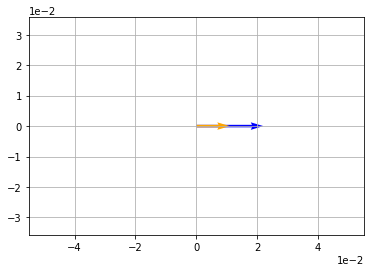

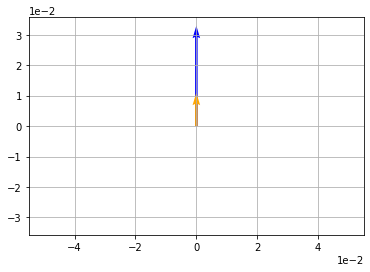

In [47]:
t1 = lam1*vec1
print (t1)
t2 = lam2*vec2
print (t2)

fig = plt.figure()
a=fig.add_subplot(1,1,1)
# Plot v and t1
vecs = np.array([t1,vec1])
origin = [0,0], [0,0]
plt.axis('equal')
plt.grid()
plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0))
plt.quiver(*origin, vecs[:,0], vecs[:,1], color=['blue', 'orange'], scale=10)
plt.show()
a=fig.add_subplot(1,2,1)
# Plot v and t2
vecs = np.array([t2,vec2])
origin = [0,0], [0,0]
plt.axis('equal')
plt.grid()
plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0))
plt.quiver(*origin, vecs[:,0], vecs[:,1], color=['blue', 'orange'], scale=10)
plt.show()

Similarly, earlier we examined the following matrix transformation:

$$\begin{bmatrix}2 & 0\\0 & 2\end{bmatrix} \cdot  \begin{bmatrix}1\\0\end{bmatrix} = \begin{bmatrix}2\\0\end{bmatrix}$$

And we saw that you can achieve the same result by mulitplying the vector by the scalar value ***2***:

$$2 \times \begin{bmatrix}1\\0\end{bmatrix} = \begin{bmatrix}2\\0\end{bmatrix}$$

This works because the scalar value 2 and the vector (1,0) are an eigenvalue-eigenvector pair for this matrix.

Let's use Python to determine the eigenvalue-eigenvector pairs for this matrix:

In [48]:
A = np.array([[2,0],
              [0,2]])
eVals, eVecs = np.linalg.eig(A)
print(eVals)
print(eVecs)

[2. 2.]
[[1. 0.]
 [0. 1.]]


So once again, there are two eigenvalue-eigenvector pairs for this matrix, as shown here:

$$ \lambda_{1} = 2, \vec{v_{1}} = \begin{bmatrix}1 \\ 0\end{bmatrix}  \;\;\;\;\;\; \lambda_{2} = 2, \vec{v_{2}} = \begin{bmatrix}0 \\ 1\end{bmatrix} $$

Let's verify that multiplying each eigenvalue-eigenvector pair corresponds to the dot-product of the eigenvector and the matrix. Here's the first pair:

$$ 2 \times \begin{bmatrix}1 \\ 0\end{bmatrix} = \begin{bmatrix}2 \\ 0\end{bmatrix}  \;\;\;and\;\;\; \begin{bmatrix}2 & 0\\0 & 2\end{bmatrix} \cdot \begin{bmatrix}1 \\ 0\end{bmatrix} = \begin{bmatrix}2 \\ 0\end{bmatrix} $$

Well, we already knew that. Now let's check the second pair:

$$ 2 \times \begin{bmatrix}0 \\ 1\end{bmatrix} = \begin{bmatrix}0 \\ 2\end{bmatrix}  \;\;\;and\;\;\; \begin{bmatrix}2 & 0\\0 & 2\end{bmatrix} \cdot \begin{bmatrix}0 \\ 1\end{bmatrix} = \begin{bmatrix}0 \\ 2\end{bmatrix} $$

Now let's use Pythonto verify and plot these transformations:

Matrix A:
[[2 0]
 [0 2]]
-------
lam1: 2.0
v1: [1. 0.]
Av1: [2. 0.]
lam1 x v1: [2. 0.]
-------
lam2: 2.0
v2: [0. 1.]
Av2: [0. 2.]
lam2 x v2: [0. 2.]


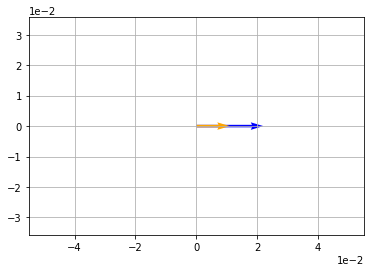

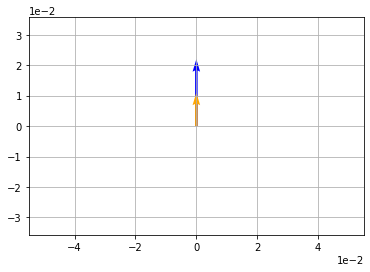

In [49]:
vec1 = eVecs[:,0]
lam1 = eVals[0]

print('Matrix A:')
print(A)
print('-------')

print('lam1: ' + str(lam1))
print ('v1: ' + str(vec1))
print ('Av1: ' + str(A@vec1))
print ('lam1 x v1: ' + str(lam1*vec1))

print('-------')

vec2 = eVecs[:,1]
lam2 = eVals[1]

print('lam2: ' + str(lam2))
print ('v2: ' + str(vec2))
print ('Av2: ' + str(A@vec2))
print ('lam2 x v2: ' + str(lam2*vec2))


# Plot the resulting vectors
t1 = lam1*vec1
t2 = lam2*vec2

fig = plt.figure()
a=fig.add_subplot(1,1,1)
# Plot v and t1
vecs = np.array([t1,vec1])
origin = [0,0], [0,0]
plt.axis('equal')
plt.grid()
plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0))
plt.quiver(*origin, vecs[:,0], vecs[:,1], color=['blue', 'orange'], scale=10)
plt.show()
a=fig.add_subplot(1,2,1)
# Plot v and t2
vecs = np.array([t2,vec2])
origin = [0,0], [0,0]
plt.axis('equal')
plt.grid()
plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0))
plt.quiver(*origin, vecs[:,0], vecs[:,1], color=['blue', 'orange'], scale=10)
plt.show()

Let's take a look at one more, slightly more complex example. Here's our matrix:

$$\begin{bmatrix}2 & 1\\1 & 2\end{bmatrix}$$

Let's get the eigenvalue and eigenvector pairs:

In [50]:
A = np.array([[2,1],
              [1,2]])

eVals, eVecs = np.linalg.eig(A)
print(eVals)
print(eVecs)

[3. 1.]
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


This time the eigenvalue-eigenvector pairs are:

$$ \lambda_{1} = 3, \vec{v_{1}} = \begin{bmatrix}0.70710678 \\ 0.70710678\end{bmatrix}  \;\;\;\;\;\; \lambda_{2} = 1, \vec{v_{2}} = \begin{bmatrix}-0.70710678 \\ 0.70710678\end{bmatrix} $$

So let's check the first pair:

$$ 3 \times \begin{bmatrix}0.70710678 \\ 0.70710678\end{bmatrix} = \begin{bmatrix}2.12132034 \\ 2.12132034\end{bmatrix}  \;\;\;and\;\;\; \begin{bmatrix}2 & 1\\0 & 2\end{bmatrix} \cdot \begin{bmatrix}0.70710678 \\ 0.70710678\end{bmatrix} = \begin{bmatrix}2.12132034 \\ 2.12132034\end{bmatrix} $$

Now let's check the second pair:

$$ 1 \times \begin{bmatrix}-0.70710678 \\ 0.70710678\end{bmatrix} = \begin{bmatrix}-0.70710678\\0.70710678\end{bmatrix}  \;\;\;and\;\;\; \begin{bmatrix}2 & 1\\1 & 2\end{bmatrix} \cdot \begin{bmatrix}-0.70710678 \\ 0.70710678\end{bmatrix} = \begin{bmatrix}-0.70710678\\0.70710678\end{bmatrix} $$

With more complex examples like this, it's generally easier to do it with Python:

Matrix A:
[[2 1]
 [1 2]]
-------
lam1: 3.0
v1: [0.70710678 0.70710678]
Av1: [2.12132034 2.12132034]
lam1 x v1: [2.12132034 2.12132034]
-------
lam2: 1.0
v2: [-0.70710678  0.70710678]
Av2: [-0.70710678  0.70710678]
lam2 x v2: [-0.70710678  0.70710678]


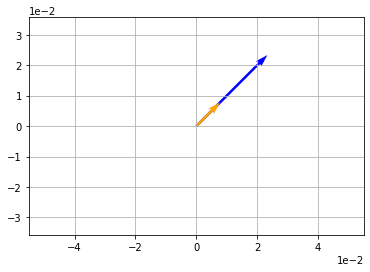

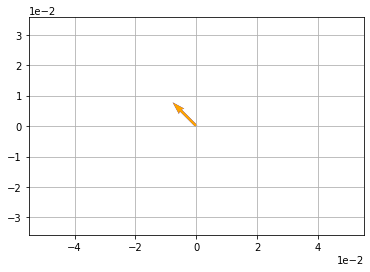

In [51]:
vec1 = eVecs[:,0]
lam1 = eVals[0]

print('Matrix A:')
print(A)
print('-------')

print('lam1: ' + str(lam1))
print ('v1: ' + str(vec1))
print ('Av1: ' + str(A@vec1))
print ('lam1 x v1: ' + str(lam1*vec1))

print('-------')

vec2 = eVecs[:,1]
lam2 = eVals[1]

print('lam2: ' + str(lam2))
print ('v2: ' + str(vec2))
print ('Av2: ' + str(A@vec2))
print ('lam2 x v2: ' + str(lam2*vec2))


# Plot the results
t1 = lam1*vec1
t2 = lam2*vec2

fig = plt.figure()
a=fig.add_subplot(1,1,1)
# Plot v and t1
vecs = np.array([t1,vec1])
origin = [0,0], [0,0]
plt.axis('equal')
plt.grid()
plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0))
plt.quiver(*origin, vecs[:,0], vecs[:,1], color=['blue', 'orange'], scale=10)
plt.show()
a=fig.add_subplot(1,2,1)
# Plot v and t2
vecs = np.array([t2,vec2])
origin = [0,0], [0,0]
plt.axis('equal')
plt.grid()
plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0))
plt.quiver(*origin, vecs[:,0], vecs[:,1], color=['blue', 'orange'], scale=10)
plt.show()

### 5.4 Eigendecomposition
So we've learned a little about eigenvalues and eigenvectors; but you may be wondering what use they are. Well, one use for them is to help decompose transformation matrices.

Recall that previously we found that a matrix transformation of a vector changes its magnitude, amplitude, or both. Without getting too technical about it, we need to remember that vectors can exist in any spatial orientation, or *basis*; and the same transformation can be applied in different *bases*.

We can decompose a matrix using the following formula:

$$A = Q \Lambda Q^{-1}$$

Where ***A*** is a trasformation that can be applied to a vector in its current base, ***Q*** is a matrix of eigenvectors that defines a change of basis, and ***&Lambda;*** is a matrix with eigenvalues on the diagonal that defines the same linear transformation as ***A*** in the base defined by ***Q***.

Let's look at these in some more detail. Consider this matrix:

$$A=\begin{bmatrix}3 & 2\\1 & 0\end{bmatrix}$$

***Q*** is a matrix in which each column is an eigenvector of ***A***; which as we've seen previously, we can calculate using Python:

In [52]:
A = np.array([[3,2],
              [1,0]])

l, Q = np.linalg.eig(A)
print(Q)

[[ 0.96276969 -0.48963374]
 [ 0.27032301  0.87192821]]


So for matrix ***A***, ***Q*** is the following matrix:

$$Q=\begin{bmatrix}0.96276969 & -0.48963374\\0.27032301 & 0.87192821\end{bmatrix}$$

***&Lambda;*** is a matrix that contains the eigenvalues for ***A*** on the diagonal, with zeros in all other elements; so for a 2x2 matrix, &Lambda; will look like this:

$$\Lambda=\begin{bmatrix}\lambda_{1} & 0\\0 & \lambda_{2}\end{bmatrix}$$

In our Python code, we've already used the ***linalg.eig*** function to return the array of eigenvalues for ***A*** into the variable ***l***, so now we just need to format that as a matrix:

In [53]:
L = np.diag(l)
print (L)

[[ 3.56155281  0.        ]
 [ 0.         -0.56155281]]


So ***&Lambda;*** is the following matrix:

$$\Lambda=\begin{bmatrix}3.56155281 & 0\\0 & -0.56155281\end{bmatrix}$$

Now we just need to find ***Q<sup>-1</sup>***, which is the inverse of ***Q***:

In [55]:
Qinv = np.linalg.inv(Q)
print(Qinv)

[[ 0.89720673  0.50382896]
 [-0.27816009  0.99068183]]


The inverse of ***Q*** then, is:

$$Q^{-1}=\begin{bmatrix}0.89720673 & 0.50382896\\-0.27816009 & 0.99068183\end{bmatrix}$$

So what does that mean? Well, it means that we can decompose the transformation of *any* vector multiplied by matrix ***A*** into the separate operations ***Q&Lambda;Q<sup>-1</sup>***:

$$A\vec{v} = Q \Lambda Q^{-1}\vec{v}$$

To prove this, let's take vector ***v***:

$$\vec{v} = \begin{bmatrix}1\\3\end{bmatrix} $$

Our matrix transformation using ***A*** is:

$$\begin{bmatrix}3 & 2\\1 & 0\end{bmatrix} \cdot \begin{bmatrix}1\\3\end{bmatrix} $$

So let's show the results of that using Python:

[9 1]


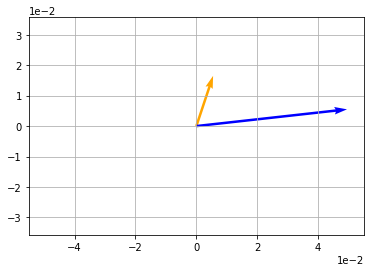

In [57]:
v = np.array([1,3])
t = A@v

print(t)

# Plot v and t
vecs = np.array([v,t])
origin = [0,0], [0,0]
plt.axis('equal')
plt.grid()
plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0))
plt.quiver(*origin, vecs[:,0], vecs[:,1], color=['orange', 'b'], scale=20)
plt.show()

And now, let's do the same thing using the ***Q&Lambda;Q<sup>-1</sup>*** sequence of operations:

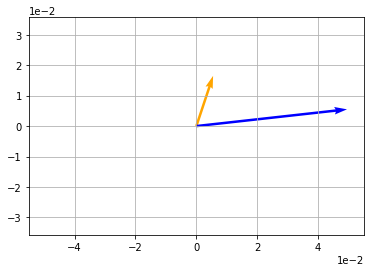

In [59]:
t = (Q@(L@(Qinv)))@v

# Plot v and t
vecs = np.array([v,t])
origin = [0,0], [0,0]
plt.axis('equal')
plt.grid()
plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0))
plt.quiver(*origin, vecs[:,0], vecs[:,1], color=['orange', 'b'], scale=20)
plt.show()

So ***A*** and ***Q&Lambda;Q<sup>-1</sup>*** are equivalent.

If we view the intermediary stages of the decomposed transformation, you can see the transformation using ***A*** in the original base for ***v*** (orange to blue) and the transformation using ***&Lambda;*** in the change of basis decribed by ***Q*** (red to magenta):

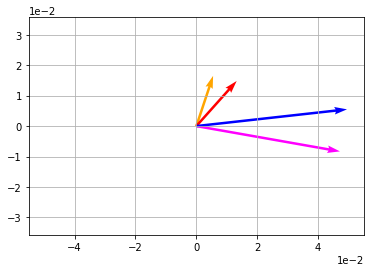

In [61]:
t1 = Qinv@v
t2 = L@t1
t3 = Q@t2

# Plot the transformations
vecs = np.array([v,t1, t2, t3])
origin = [0,0,0,0], [0,0,0,0]
plt.axis('equal')
plt.grid()
plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0))
plt.quiver(*origin, vecs[:,0], vecs[:,1], color=['orange', 'red', 'magenta', 'blue'], scale=20)
plt.show()

So from this visualization, it should be apparent that the transformation ***Av*** can be performed by changing the basis for ***v*** using ***Q*** (from orange to red in the above plot) applying the equivalent linear transformation in that base using ***&Lambda;*** (red to magenta), and switching back to the original base using ***Q<sup>-1</sup>*** (magenta to blue).

### 5.5 Rank of a Matrix

The **rank** of a square matrix is the number of non-zero eigenvalues of the matrix. A **full rank** matrix has the same number of non-zero eigenvalues as the dimension of the matrix. A **rank-deficient** matrix has fewer non-zero eigenvalues as dimensions. The inverse of a rank deficient matrix is singular and so does not exist (this is why in a previous notebook we noted that some matrices have no inverse).

Consider the following matrix ***A***:

$$A=\begin{bmatrix}1 & 2\\4 & 3\end{bmatrix}$$

Let's find its eigenvalues (***&Lambda;***):

In [62]:
A = np.array([[1,2],
              [4,3]])
l, Q = np.linalg.eig(A)
L = np.diag(l)
print(L)

[[-1.  0.]
 [ 0.  5.]]


$$\Lambda=\begin{bmatrix}-1 & 0\\0 & 5\end{bmatrix}$$

This matrix has full rank. The dimensions of the matrix is 2. There are two non-zero eigenvalues. 

Now consider this matrix:

$$B=\begin{bmatrix}3 & -3 & 6\\2 & -2 & 4\\1 & -1 & 2\end{bmatrix}$$

Note that the second and third columns are just scalar multiples of the first column.

Let's examine it's eigenvalues:

In [63]:
B = np.array([[3,-3,6],
              [2,-2,4],
              [1,-1,2]])
lb, Qb = np.linalg.eig(B)
Lb = np.diag(lb)
print(Lb)

[[3.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 5.23364153e-16 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]]


$$\Lambda=\begin{bmatrix}3 & 0& 0\\0 & -6\times10^{-17} & 0\\0 & 0 & 3.6\times10^{-16}\end{bmatrix}$$

Note that matrix has only 1 non-zero eigenvalue. The other two eigenvalues are so extremely small as to be effectively zero. This is an example of a rank-deficient matrix; and as such, it has no inverse.

### 5.6 Inverse of a Square Full Rank Matrix
You can calculate the inverse of a square full rank matrix by using the following formula:

$$A^{-1} = Q \Lambda^{-1} Q^{-1}$$

Let's apply this to matrix ***A***:

$$A=\begin{bmatrix}1 & 2\\4 & 3\end{bmatrix}$$

Let's find the matrices for ***Q***, ***&Lambda;<sup>-1</sup>***, and ***Q<sup>-1</sup>***:

In [64]:
A = np.array([[1,2],
              [4,3]])

l, Q = np.linalg.eig(A)
L = np.diag(l)
print(Q)
Linv = np.linalg.inv(L)
Qinv = np.linalg.inv(Q)
print(Linv)
print(Qinv)

[[-0.70710678 -0.4472136 ]
 [ 0.70710678 -0.89442719]]
[[-1.  -0. ]
 [ 0.   0.2]]
[[-0.94280904  0.47140452]
 [-0.74535599 -0.74535599]]
